In [ ]:
import ROOT
import math

ROOT.gROOT.Macro("rootlogon.C")
ROOT.gStyle.SetOptStat(000000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


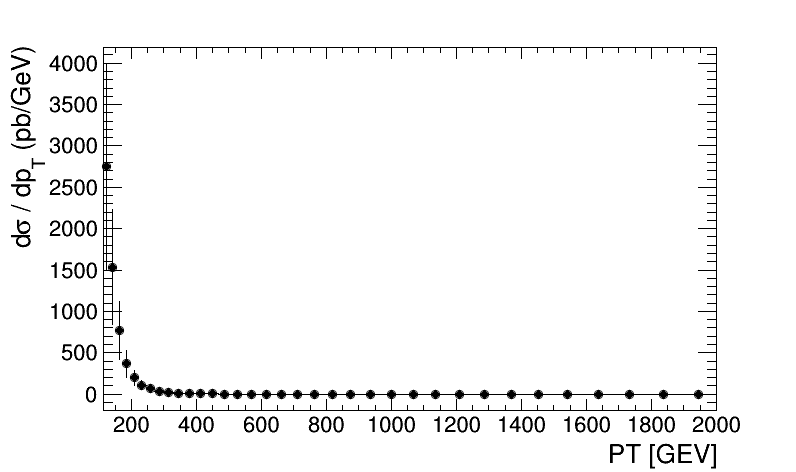

In [5]:
f = ROOT.TFile("HEPData-ins1459051-v1-root.root")

c1 = ROOT.TCanvas("c1", "c1")
hists = []
for i in xrange(1,6):
    h = f.Get("Table " + str(i) +"/Hist1D_y1_e2").Clone('h' + str(i))
    hists.append(h)

for ipt in xrange(1,hists[0].GetNbinsX()) :
    val = hists[0].GetBinContent(ipt)
    err = hists[0].GetBinError(ipt)
    err *= err
    for ieta in xrange(1,len(hists)):
        if ipt < hists[ieta].GetNbinsX() : 
            vali = hists[ieta].GetBinContent(ipt)
            erri = hists[ieta].GetBinError(ipt)
            erri *= erri
            val += vali
            err += erri
    
        
    hists[0].SetBinContent( ipt, val )
    hists[0].SetBinError( ipt, math.sqrt(err) )
    

hists[0].SetTitle('')
hists[0].GetYaxis().SetTitle("d#sigma / dp_{T} (pb/GeV)")
hists[0].GetYaxis().SetTitleOffset(1.0)
hists[0].Draw('e')
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file compare_smp15007_smp16010.png has been created
Info in <TCanvas::Print>: pdf file compare_smp15007_smp16010.pdf has been created


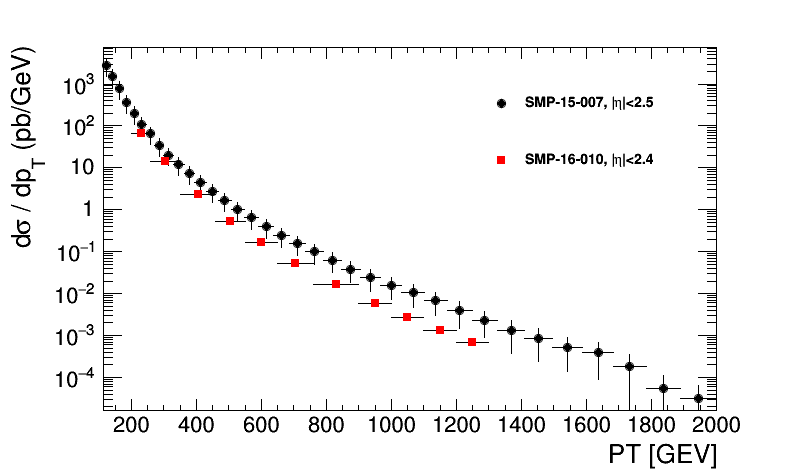

In [7]:




f2 = ROOT.TFile("pt_xs.root")

c2d_response_nomnom_ptcanvas = f2.Get("c2d_response_nomnom_ptcanvas")

l = c2d_response_nomnom_ptcanvas.GetPrimitive("padc2d_response_nomnom_ptcanvas1")
h = l.GetPrimitive("2d_response_nomnom_ptplot").Clone("ours")
h.SetMarkerStyle(21)
h.SetMarkerColor(2)

c2 = ROOT.TCanvas("c2", "c2")
hists[0].Draw()   
h.Draw('e same')


leg = ROOT.TLegend(0.6, 0.6, 0.84, 0.84)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry( hists[0], "SMP-15-007, |#eta|<2.5", 'p')
leg.AddEntry( h, "SMP-16-010, |#eta|<2.4", 'p')
leg.Draw()

c2.SetLogy()
c2.Draw()
c2.Print("compare_smp15007_smp16010.png", "png")
c2.Print("compare_smp15007_smp16010.pdf", "pdf")